# **Importing the dataset with Data Augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


# Define the paths
train_dir = '/kaggle/input/organized-dataset-of-mri-images-for-alzheimers/alzheimer dataset/train'
test_dir = '/kaggle/input/organized-dataset-of-mri-images-for-alzheimers/alzheimer dataset/test'

# Create an ImageDataGenerator object for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.4,
    zoom_range=0.2,

    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load the images and labels, ensuring grayscale (1 color channel)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),        # Resize images to 128x128
    class_mode='categorical',
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    class_mode='categorical',

)


2024-08-27 08:45:42.754731: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-27 08:45:42.754848: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-27 08:45:42.935587: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 4647 images belonging to 4 classes.
Found 744 images belonging to 4 classes.


# **Plotting the first 5 images of train and test**

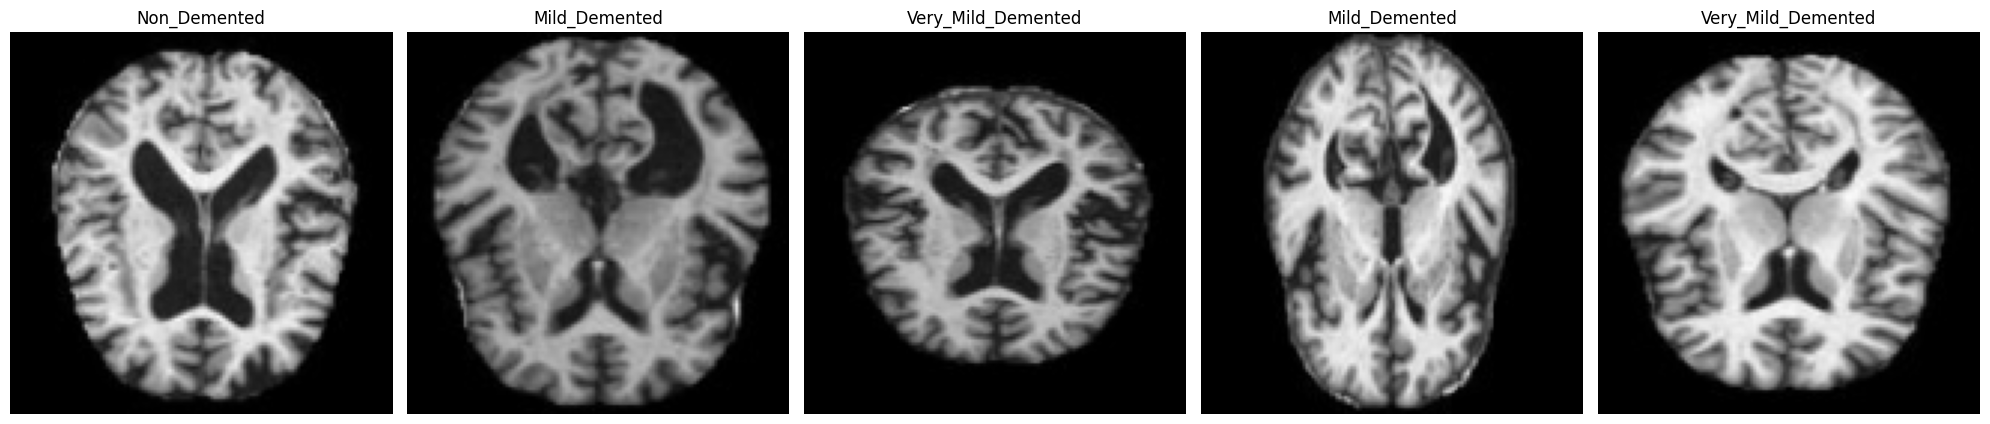

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot images
def plot_images(images_arr, labels_arr, classes):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax, label in zip(images_arr, axes, labels_arr):
        ax.imshow(img)
        ax.set_title(classes[np.argmax(label)])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Get the first 5 images and labels from the training generator
train_images, train_labels = next(train_generator)
plot_images(train_images[:5], train_labels[:5], classes=list(train_generator.class_indices.keys()))


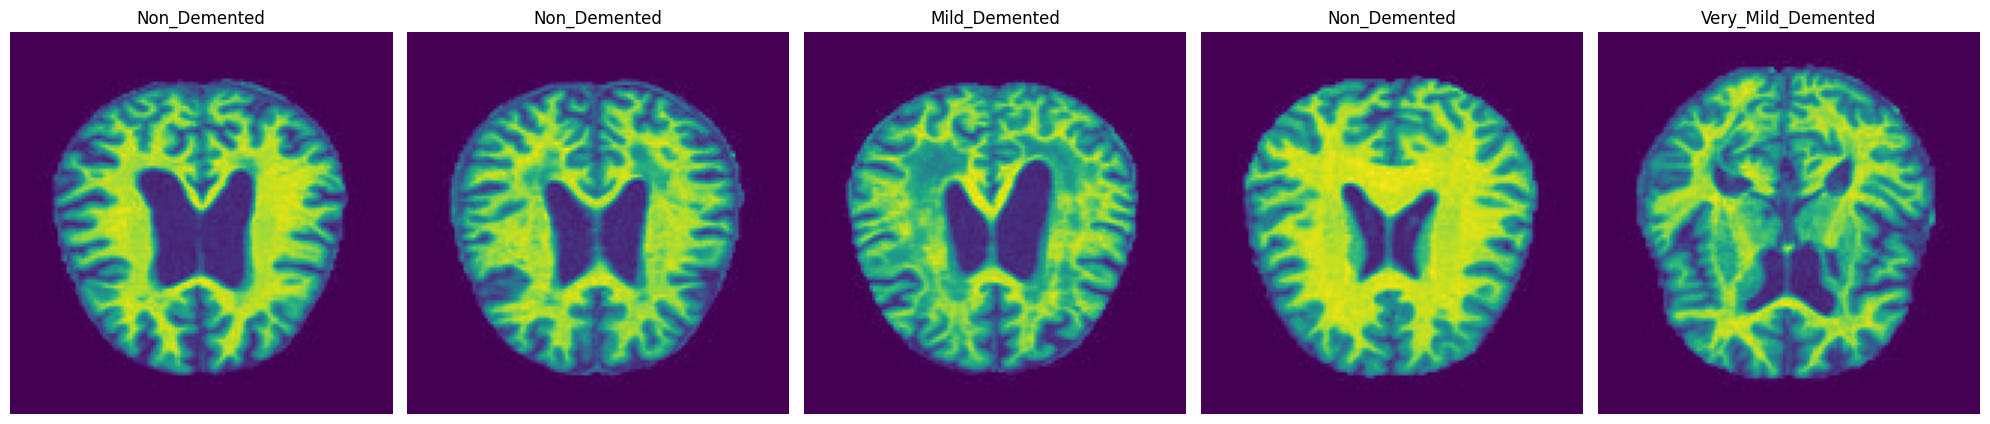

In [ ]:
# Get the first 5 images and labels from the test generator
test_images, test_labels = next(test_generator)
plot_images(test_images[:5], test_labels[:5], classes=list(test_generator.class_indices.keys()))


# **Model Building**

# **CNN MODELS**

1. CNN Variant1 - 5 Conv2D layers, kernel size - 3*3

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import Dense
import numpy as np

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
CNN1 = Sequential()

# Convolutional layers
CNN1.add(Conv2D(256, (3, 3), activation='relu', input_shape=(128, 128,1)))
CNN1.add(MaxPooling2D(pool_size=(2, 2)))

CNN1.add(Conv2D(64, (3, 3), activation='relu'))
CNN1.add(MaxPooling2D(pool_size=(2, 2)))

CNN1.add(Conv2D(256, (3, 3), activation='relu'))
CNN1.add(MaxPooling2D(pool_size=(2, 2)))

CNN1.add(Conv2D(128, (3, 3), activation='relu'))
CNN1.add(MaxPooling2D(pool_size=(2, 2)))

CNN1.add(Conv2D(256, (3, 3), activation='relu'))
CNN1.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers before feeding into dense layers
CNN1.add(Flatten())

# Fully connected layers
CNN1.add(Dense(128, activation='relu'))
CNN1.add(Dropout(0.2))  # Dropout to prevent overfitting
CNN1.add(Dense(64, activation='relu'))

# Output layer (adjust number of units to match the number of classes)
CNN1.add(Dense(4, activation='softmax'))  # Assuming 4 classes based on the dataset

# Compile the model
CNN1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
CNN1.summary()


Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_355 (Conv2D)             │ (None, 126, 126, 256)  │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_67 (MaxPooling2D) │ (None, 63, 63, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_356 (Conv2D)             │ (None, 61, 61, 64)     │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_68 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_357 (Conv2D)             │ (None, 28, 28, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_69 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_358 (Conv2D)             │ (None, 12, 12, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_70 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_359 (Conv2D)             │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_71 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_51 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_149 (Dense)               │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_90 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_150 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,027,716 (3.92 MB)

 Trainable params: 1,027,716 (3.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
CNN1.fit(train_generator,epochs=50)

Epoch 1/50
  2/146 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.6719 - loss: 1.2794

W0000 00:00:1723458236.996018     159 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


  7/146 ━━━━━━━━━━━━━━━━━━━━ 1:08 496ms/step - accuracy: 0.7060 - loss: 1.0948

W0000 00:00:1723458239.882765     161 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


146/146 ━━━━━━━━━━━━━━━━━━━━ 23s 123ms/step - accuracy: 0.6073 - loss: 1.0216
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.5925 - loss: 0.9389
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.6167 - loss: 0.8193
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.6350 - loss: 0.7970
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - accuracy: 0.6290 - loss: 0.7747
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.6601 - loss: 0.7501
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.6615 - loss: 0.7163
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.6924 - loss: 0.6856
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.6996 - loss: 0.6673
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - accuracy: 0.7078 - loss: 0.6591
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.7065 - loss: 0.6465
Epoch 12/50
146/146 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Evaluate the model on the test data
loss, accuracy1 = CNN1.evaluate(test_generator)

# Print the accuracy
print(f"Test Accuracy of CNN1: {accuracy1}")


 3/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9809 - loss: 0.0665  

W0000 00:00:1723459089.766960     160 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.9453 - loss: 0.1710
Test Accuracy of CNN1: 0.9395161271095276


2. CNN Variant2 - 3 Conv2D layers, kernel size - 3*3

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
CNN2 = Sequential()

# Convolutional layers
CNN2.add(Conv2D(256, (3, 3), activation='relu', input_shape=(128, 128,1)))
CNN2.add(MaxPooling2D(pool_size=(2, 2)))

CNN2.add(Conv2D(64, (3, 3), activation='relu'))
CNN2.add(MaxPooling2D(pool_size=(2, 2)))

CNN2.add(Conv2D(256, (3, 3), activation='relu'))
CNN2.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers before feeding into dense layers
CNN2.add(Flatten())

# Fully connected layers
CNN2.add(Dense(128, activation='relu'))
CNN2.add(Dropout(0.2))  # Dropout to prevent overfitting
CNN2.add(Dense(64, activation='relu'))

# Output layer (adjust number of units to match the number of classes)
CNN2.add(Dense(4, activation='softmax'))  # Assuming 4 classes based on the dataset

# Compile the model
CNN2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
CNN2.summary()


Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_360 (Conv2D)             │ (None, 126, 126, 256)  │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_72 (MaxPooling2D) │ (None, 63, 63, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_361 (Conv2D)             │ (None, 61, 61, 64)     │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_73 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_362 (Conv2D)             │ (None, 28, 28, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_74 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_52 (Flatten)            │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_91 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,728,964 (25.67 MB)

 Trainable params: 6,728,964 (25.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
CNN2.fit(train_generator,epochs=50)

Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 24s 133ms/step - accuracy: 0.5385 - loss: 1.0740
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 22s 146ms/step - accuracy: 0.5976 - loss: 0.8884
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 23s 147ms/step - accuracy: 0.6306 - loss: 0.7995
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.6324 - loss: 0.7786
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 18s 115ms/step - accuracy: 0.6435 - loss: 0.7471
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - accuracy: 0.6519 - loss: 0.7380
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.6476 - loss: 0.7345
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.6675 - loss: 0.6991
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 16s 108ms/step - accuracy: 0.7064 - loss: 0.6619
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.6862 - loss: 0.6762
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.7015 - loss: 0.6272
Epoch 12/50
146/146 ━━━━

In [ ]:
# Evaluate the model on the test data
loss, accuracy2 = CNN2.evaluate(test_generator)

# Print the accuracy
print(f"Test Accuracy of CNN1: {accuracy2}")


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9585 - loss: 0.1033
Test Accuracy of CNN1: 0.9475806355476379


3. CNN Variant3 - 3 Conv2D layers, kernel size - 4*4

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
CNN3 = Sequential()

# Convolutional layers
CNN3.add(Conv2D(256, (4, 4), activation='relu', input_shape=(128, 128,1)))
CNN3.add(MaxPooling2D(pool_size=(2, 2)))

CNN3.add(Conv2D(64, (4, 4), activation='relu'))
CNN3.add(MaxPooling2D(pool_size=(2, 2)))

CNN3.add(Conv2D(256, (4, 4), activation='relu'))
CNN3.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers before feeding into dense layers
CNN3.add(Flatten())

# Fully connected layers
CNN3.add(Dense(128, activation='relu'))
CNN3.add(Dropout(0.2))  # Dropout to prevent overfitting
CNN3.add(Dense(64, activation='relu'))

# Output layer (adjust number of units to match the number of classes)
CNN3.add(Dense(4, activation='softmax'))  # Assuming 4 classes based on the dataset

# Compile the model
CNN3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
CNN3.summary()


Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_363 (Conv2D)             │ (None, 125, 125, 256)  │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_75 (MaxPooling2D) │ (None, 62, 62, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_364 (Conv2D)             │ (None, 59, 59, 64)     │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_76 (MaxPooling2D) │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_365 (Conv2D)             │ (None, 26, 26, 256)    │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_77 (MaxPooling2D) │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_53 (Flatten)            │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 128)            │     5,537,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_92 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,075,396 (23.18 MB)

 Trainable params: 6,075,396 (23.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
CNN3.fit(train_generator,epochs=50)

Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - accuracy: 0.5291 - loss: 1.1040
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.6057 - loss: 0.9322
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.6155 - loss: 0.8173
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - accuracy: 0.6300 - loss: 0.7822
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.6804 - loss: 0.7219
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.6691 - loss: 0.7333
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.6884 - loss: 0.6745
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.6904 - loss: 0.6688
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.7095 - loss: 0.6321
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.7279 - loss: 0.6051
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.7392 - loss: 0.5871
Epoch 12/50
146/146 ━━━━━━━━━

In [ ]:
# Evaluate the model on the test data
loss, accuracy3 = CNN3.evaluate(test_generator)

# Print the accuracy
print(f"Test Accuracy of CNN1: {accuracy3}")


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.9941 - loss: 0.0267
Test Accuracy of CNN1: 0.9946236610412598


# **VGG16 Models**

1. VVG16 variant1

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
import tensorflow as tf
# Adjust the input shape to accept grayscale images
input_tensor = Input(shape=(128, 128, 1))
input_tensor_rgb = tf.keras.layers.Concatenate()([input_tensor, input_tensor, input_tensor])

# Load the VGG16 model with adjusted input
vgg16 = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor_rgb)

# Continue with the same steps as before

modelvgg16 = Sequential()
modelvgg16.add(vgg16)

# Add custom top layers for classification
modelvgg16.add(Flatten())
modelvgg16.add(Dense(256, activation='relu'))
modelvgg16.add(Dropout(0.5))
modelvgg16.add(Dense(128, activation='relu'))
modelvgg16.add(Dropout(0.5))

# Output layer (adjust the number of units to match your classes)
modelvgg16.add(Dense(4, activation='softmax'))

# Freeze the layers in the VGG16 model to prevent them from being trained
for layer in vgg16.layers:
    layer.trainable = False

# Compile the model
modelvgg16.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
modelvgg16.fit(train_generator,epochs=50)

Epoch 1/50
 61/146 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.4852 - loss: 1.2546

W0000 00:00:1723460619.661058     159 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


146/146 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step - accuracy: 0.5133 - loss: 1.1742
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.5650 - loss: 0.9845
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.5779 - loss: 0.9400
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.5784 - loss: 0.9188
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.6138 - loss: 0.8852
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.6204 - loss: 0.8584
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - accuracy: 0.6166 - loss: 0.8592
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.6278 - loss: 0.8413
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.6346 - loss: 0.8005
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.6365 - loss: 0.7951
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.6333 - loss: 0.7964
Epoch 12/50
146/146 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Evaluate the model on the test data
loss, accuracy4 = modelvgg16.evaluate(test_generator)

# Print the accuracy
print(f"Test Accuracy of CNN1: {accuracy4}")


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7653 - loss: 0.5489
Test Accuracy of CNN1: 0.7715053558349609


2. VVG16 variant2 - custom vgg18 , 2 Conv2D layers

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Adjust the input shape to accept grayscale images
input_tensor = Input(shape=(128, 128, 1))
input_tensor_rgb = tf.keras.layers.Concatenate()([input_tensor, input_tensor, input_tensor])

# Load the VGG16 model with adjusted input
vgg16 = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor_rgb)

# Create a Sequential model and add the VGG16 base
modelvgg16_plus_2 = Sequential()

# Add the VGG16 base model
modelvgg16_plus_2.add(vgg16)

# Add two custom Conv2D layers
modelvgg16_plus_2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
modelvgg16_plus_2.add(MaxPooling2D(pool_size=(2, 2)))
modelvgg16_plus_2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
modelvgg16_plus_2.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output and add fully connected layers
modelvgg16_plus_2.add(Flatten())
modelvgg16_plus_2.add(Dense(256, activation='relu'))
modelvgg16_plus_2.add(Dropout(0.5))
modelvgg16_plus_2.add(Dense(128, activation='relu'))
modelvgg16_plus_2.add(Dropout(0.5))

# Output layer (adjust the number of units to match your classes)
modelvgg16_plus_2.add(Dense(4, activation='softmax'))

# Optionally freeze the layers in the VGG16 base to prevent them from being trained
for layer in vgg16.layers:
    layer.trainable = False

# Compile the model
modelvgg16_plus_2.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
modelvgg16_plus_2.fit(train_generator,epochs=50)

Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 24s 108ms/step - accuracy: 0.5094 - loss: 1.1067
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.5678 - loss: 0.9545
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - accuracy: 0.5919 - loss: 0.9106
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.6124 - loss: 0.8633
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.6240 - loss: 0.8201
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.6480 - loss: 0.7963
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.6612 - loss: 0.7531
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.6598 - loss: 0.7673
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.6769 - loss: 0.7392
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.6882 - loss: 0.7112
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.6954 - loss: 0.6970
Epoch 12/50
146/146 ━━━━━━━━━

In [ ]:

# Evaluate the model on test data
loss, accuracy5 = modelvgg16_plus_2.evaluate(test_generator)
print(f"Test Accuracy: {accuracy5 * 100:.2f}%")


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.9337 - loss: 0.1853
Test Accuracy: 93.55%


# **VGG19 MODELS**

1. VGG19 variant1

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, Concatenate
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Adjust the input shape to accept grayscale images
input_tensor = Input(shape=(128, 128, 1))
input_tensor_rgb = Concatenate()([input_tensor, input_tensor, input_tensor])

# Load the VGG19 model with adjusted input
vgg19 = VGG19(weights='imagenet', include_top=False, input_tensor=input_tensor_rgb)

# Create a Sequential model and add the VGG19 base
modelvgg19 = Sequential()

# Add the VGG19 base model
modelvgg19.add(vgg19)

# Flatten the output and add fully connected layers
modelvgg19.add(Flatten())
modelvgg19.add(Dense(256, activation='relu'))
modelvgg19.add(Dropout(0.5))
modelvgg19.add(Dense(128, activation='relu'))
modelvgg19.add(Dropout(0.5))

# Output layer (adjust the number of units to match your classes)
modelvgg19.add(Dense(4, activation='softmax'))

# Optionally freeze the layers in the VGG19 base to prevent them from being trained
for layer in vgg19.layers:
    layer.trainable = False

# Compile the model
modelvgg19.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
modelvgg19.fit(train_generator,epochs=50)

Epoch 1/50
 30/146 ━━━━━━━━━━━━━━━━━━━━ 21s 185ms/step - accuracy: 0.4185 - loss: 1.3791

W0000 00:00:1723462051.018908     158 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


146/146 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.4969 - loss: 1.1933
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.5693 - loss: 1.0073
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.5950 - loss: 0.9370
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - accuracy: 0.6063 - loss: 0.9074
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - accuracy: 0.6031 - loss: 0.8887
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.5966 - loss: 0.8846
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.6039 - loss: 0.8684
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.6018 - loss: 0.8614
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - accuracy: 0.6235 - loss: 0.8337
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.6165 - loss: 0.8426
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 19s 123ms/step - accuracy: 0.6140 - loss: 0.8187
Epoch 12/50
146/146 ━━━━━━━━━━━━━━━━━

In [ ]:

# Evaluate the model on test data
loss, accuracy6 = modelvgg19.evaluate(test_generator)
print(f"Test Accuracy: {accuracy6 * 100:.2f}%")


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.7438 - loss: 0.6219
Test Accuracy: 73.52%


2. vgg19 variant 2,  2 Conv2D layers

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Input, Concatenate
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Adjust the input shape to accept grayscale images
input_tensor = Input(shape=(128, 128, 1))
input_tensor_rgb = Concatenate()([input_tensor, input_tensor, input_tensor])

# Load the VGG19 model with adjusted input
vgg19 = VGG19(weights='imagenet', include_top=False, input_tensor=input_tensor_rgb)

# Create a Sequential model and add the VGG19 base
modelvgg19_plus_2 = Sequential()

# Add the VGG19 base model
modelvgg19_plus_2.add(vgg19)

# Add two custom Conv2D layers
modelvgg19_plus_2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
modelvgg19_plus_2.add(MaxPooling2D(pool_size=(2, 2)))
modelvgg19_plus_2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
modelvgg19_plus_2.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output and add fully connected layers
modelvgg19_plus_2.add(Flatten())
modelvgg19_plus_2.add(Dense(256, activation='relu'))
modelvgg19_plus_2.add(Dropout(0.5))
modelvgg19_plus_2.add(Dense(128, activation='relu'))
modelvgg19_plus_2.add(Dropout(0.5))

# Output layer (adjust the number of units to match your classes)
modelvgg19_plus_2.add(Dense(4, activation='softmax'))

# Optionally freeze the layers in the VGG19 base to prevent them from being trained
for layer in vgg19.layers:
    layer.trainable = False

# Compile the model
modelvgg19_plus_2.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
modelvgg19_plus_2.fit(train_generator,epochs=50)

Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 25s 126ms/step - accuracy: 0.5051 - loss: 1.1301
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.5714 - loss: 0.9780
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - accuracy: 0.5922 - loss: 0.9072
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 16s 106ms/step - accuracy: 0.6148 - loss: 0.8632
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - accuracy: 0.6179 - loss: 0.8315
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 16s 104ms/step - accuracy: 0.6313 - loss: 0.8209
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.6419 - loss: 0.8043
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - accuracy: 0.6555 - loss: 0.7689
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - accuracy: 0.6402 - loss: 0.7835
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.6587 - loss: 0.7531
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.6618 - loss: 0.7529
Epoch 12/50
146/146 ━━━━━

In [ ]:

# Evaluate the model on test data
loss, accuracy7 = modelvgg19_plus_2.evaluate(test_generator)
print(f"Test Accuracy: {accuracy7 * 100:.2f}%")


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8634 - loss: 0.3778
Test Accuracy: 86.29%


# **ResNet50 MODELS**

1. ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, Concatenate
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Adjust the input shape to accept grayscale images
input_tensor = Input(shape=(128, 128, 1))

# Convert grayscale to 3 channels by concatenating the input three times
input_tensor_rgb = Concatenate()([input_tensor, input_tensor, input_tensor])

# Load the ResNet50 model with adjusted input
resnet50 = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor_rgb)

# Create a Sequential model and add the ResNet50 base
modelresnet50 = Sequential()

# Add the ResNet50 base model
modelresnet50.add(resnet50)

# Flatten the output and add fully connected layers
modelresnet50.add(Flatten())
modelresnet50.add(Dense(256, activation='relu'))
modelresnet50.add(Dropout(0.5))
modelresnet50.add(Dense(128, activation='relu'))
modelresnet50.add(Dropout(0.5))

# Output layer (adjust the number of units to match your classes)
modelresnet50.add(Dense(4, activation='softmax'))

# Optionally freeze the layers in the ResNet50 base to prevent them from being trained
for layer in resnet50.layers:
    layer.trainable = False

# Compile the model
modelresnet50.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
modelresnet50.fit(train_generator,epochs=50)

Epoch 1/50
  3/146 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.1042 - loss: 2.3469

W0000 00:00:1723463599.287576     160 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 78/146 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.4343 - loss: 1.3692

W0000 00:00:1723463611.508527     158 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 130ms/step - accuracy: 0.4686 - loss: 1.2779
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - accuracy: 0.5486 - loss: 1.0708
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - accuracy: 0.5713 - loss: 1.0119
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.5782 - loss: 1.0003
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 26s 174ms/step - accuracy: 0.5885 - loss: 0.9837
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 37s 241ms/step - accuracy: 0.5754 - loss: 0.9782
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 201ms/step - accuracy: 0.5843 - loss: 0.9571
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 208ms/step - accuracy: 0.5844 - loss: 0.9521
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 33s 215ms/step - accuracy: 0.6032 - loss: 0.9377
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 25s 161ms/step - accuracy: 0.5973 - loss: 0.9306
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.5933 - loss: 0.9229
Epoch 12/50
146/146 ━━━━━━━━━━━━

In [ ]:

# Evaluate the model on test data
loss, accuracy8 = modelresnet50.evaluate(test_generator)
print(f"Test Accuracy: {accuracy8 * 100:.2f}%")


 4/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.4870 - loss: 0.9533

W0000 00:00:1723464435.125653     158 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 233ms/step - accuracy: 0.4755 - loss: 1.0107
Test Accuracy: 46.51%


W0000 00:00:1723464440.499915     160 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2. custom ResNet52

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Input, Concatenate
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Adjust the input shape to accept grayscale images
input_tensor = Input(shape=(128, 128, 1))

# Convert grayscale to 3 channels by concatenating the input three times
input_tensor_rgb = Concatenate()([input_tensor, input_tensor, input_tensor])

# Load the ResNet50 model with adjusted input
resnet50 = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor_rgb)

# Create a Sequential model and add the ResNet50 base
modelresnet50_plus_2 = Sequential()

# Add the ResNet50 base model
modelresnet50_plus_2.add(resnet50)

# Add two custom Conv2D layers
modelresnet50_plus_2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
modelresnet50_plus_2.add(MaxPooling2D(pool_size=(2, 2)))
modelresnet50_plus_2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
modelresnet50_plus_2.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output and add fully connected layers
modelresnet50_plus_2.add(Flatten())
modelresnet50_plus_2.add(Dense(256, activation='relu'))
modelresnet50_plus_2.add(Dropout(0.5))
modelresnet50_plus_2.add(Dense(128, activation='relu'))
modelresnet50_plus_2.add(Dropout(0.5))

# Output layer (adjust the number of units to match your classes)
modelresnet50_plus_2.add(Dense(4, activation='softmax'))

# Optionally freeze the layers in the ResNet50 base to prevent them from being trained
for layer in resnet50.layers:
    layer.trainable = False

# Compile the model
modelresnet50_plus_2.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
modelresnet50_plus_2.fit(train_generator,epochs=50)

Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 122ms/step - accuracy: 0.5460 - loss: 1.0836
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.5794 - loss: 1.0078
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.5786 - loss: 0.9926
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 19s 128ms/step - accuracy: 0.5872 - loss: 0.9605
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.5797 - loss: 0.9586
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.5845 - loss: 0.9356
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.6032 - loss: 0.8893
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - accuracy: 0.5996 - loss: 0.8813
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.6039 - loss: 0.8637
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.6131 - loss: 0.8297
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.6284 - loss: 0.8302
Epoch 12/50
146/146 ━━━━━━━━

In [ ]:

# Evaluate the model on test data
loss, accuracy9 = modelresnet50_plus_2.evaluate(test_generator)
print(f"Test Accuracy: {accuracy9 * 100:.2f}%")


24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 163ms/step - accuracy: 0.6497 - loss: 0.8295
Test Accuracy: 64.52%


# **ResNet101 MODELS**

1. ResNet101

In [ ]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, Concatenate
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Adjust the input shape to accept grayscale images
input_tensor = Input(shape=(128, 128, 1))

# Convert grayscale to 3 channels by concatenating the input three times
input_tensor_rgb = Concatenate()([input_tensor, input_tensor, input_tensor])

# Load the ResNet101 model with adjusted input
resnet101 = ResNet101(weights='imagenet', include_top=False, input_tensor=input_tensor_rgb)

# Create a Sequential model and add the ResNet101 base
modelresnet101 = Sequential()

# Add the ResNet101 base model
modelresnet101.add(resnet101)

# Flatten the output and add fully connected layers
modelresnet101.add(Flatten())
modelresnet101.add(Dense(256, activation='relu'))
modelresnet101.add(Dropout(0.5))
modelresnet101.add(Dense(128, activation='relu'))
modelresnet101.add(Dropout(0.5))

# Output layer (adjust the number of units to match your classes)
modelresnet101.add(Dense(4, activation='softmax'))

# Optionally freeze the layers in the ResNet101 base to prevent them from being trained
for layer in resnet101.layers:
    layer.trainable = False

# Compile the model
modelresnet101.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
modelresnet101.fit(train_generator,epochs=50)

Epoch 1/50
  2/146 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.1797 - loss: 1.5793 

W0000 00:00:1723465187.844772     158 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 60/146 ━━━━━━━━━━━━━━━━━━━━ 17s 208ms/step - accuracy: 0.4605 - loss: 1.2172

W0000 00:00:1723465199.941742     159 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 136ms/step - accuracy: 0.5020 - loss: 1.1464
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - accuracy: 0.5546 - loss: 1.0316
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.5773 - loss: 1.0252
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.5858 - loss: 0.9936
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.5834 - loss: 0.9870
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.5816 - loss: 0.9838
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.5892 - loss: 0.9635
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.6041 - loss: 0.9408
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.5936 - loss: 0.9345
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.5999 - loss: 0.9334
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.5981 - loss: 0.9296
Epoch 12/50
146/146 ━━━━━━━━━━━━━━━━━━━━

In [ ]:

# Evaluate the model on test data
loss, accuracy10 = modelresnet101.evaluate(test_generator)
print(f"Test Accuracy: {accuracy10 * 100:.2f}%")


 3/24 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.4826 - loss: 0.9588

W0000 00:00:1723465899.565370     160 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 217ms/step - accuracy: 0.4818 - loss: 0.9725
Test Accuracy: 48.25%


W0000 00:00:1723465904.584578     161 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2. Custom ResNet103

In [ ]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Input, Concatenate
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Adjust the input shape to accept grayscale images
input_tensor = Input(shape=(128, 128, 1))

# Convert grayscale to 3 channels by concatenating the input three times
input_tensor_rgb = Concatenate()([input_tensor, input_tensor, input_tensor])

# Load the ResNet101 model with adjusted input
resnet101 = ResNet101(weights='imagenet', include_top=False, input_tensor=input_tensor_rgb)

# Create a Sequential model and add the ResNet101 base
modelresnet101_plus_2 = Sequential()

# Add the ResNet101 base model
modelresnet101_plus_2.add(resnet101)

# Add custom Conv2D layers
modelresnet101_plus_2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
modelresnet101_plus_2.add(MaxPooling2D(pool_size=(2, 2)))
modelresnet101_plus_2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
modelresnet101_plus_2.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output and add fully connected layers
modelresnet101_plus_2.add(Flatten())
modelresnet101_plus_2.add(Dense(256, activation='relu'))
modelresnet101_plus_2.add(Dropout(0.5))
modelresnet101_plus_2.add(Dense(128, activation='relu'))
modelresnet101_plus_2.add(Dropout(0.5))

# Output layer (adjust the number of units to match your classes)
modelresnet101_plus_2.add(Dense(4, activation='softmax'))

# Optionally freeze the layers in the ResNet101 base to prevent them from being trained
for layer in resnet101.layers:
    layer.trainable = False

# Compile the model
modelresnet101_plus_2.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
modelresnet101_plus_2.fit(train_generator,epochs=50)

Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 43s 140ms/step - accuracy: 0.5218 - loss: 1.1033
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.5903 - loss: 0.9916
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.5867 - loss: 0.9863
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.5936 - loss: 0.9633
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - accuracy: 0.5774 - loss: 0.9560
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - accuracy: 0.5910 - loss: 0.9387
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.5921 - loss: 0.9222
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.5854 - loss: 0.9178
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.5836 - loss: 0.8882
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.5970 - loss: 0.8818
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.5995 - loss: 0.8870
Epoch 12/50
146/146 ━━━━━━━━━

In [ ]:

# Evaluate the model on test data
loss, accuracy11 = modelresnet101_plus_2.evaluate(test_generator)
print(f"Test Accuracy: {accuracy11 * 100:.2f}%")


24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 209ms/step - accuracy: 0.6852 - loss: 0.8362
Test Accuracy: 69.76%


# **EfficientNet Models**

1. EfficientNetB0

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, Concatenate
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Adjust the input shape to accept grayscale images
input_tensor = Input(shape=(128, 128, 1))

# Convert grayscale to 3 channels by concatenating the input three times
input_tensor_rgb = Concatenate()([input_tensor, input_tensor, input_tensor])

# Load the EfficientNetB0 model with adjusted input
efficientnetb0 = EfficientNetB0(weights='imagenet', include_top=False, input_tensor=input_tensor_rgb)

# Create a Sequential model and add the EfficientNetB0 base
modelefficientnetb0 = Sequential()

# Add the EfficientNetB0 base model
modelefficientnetb0.add(efficientnetb0)

# Flatten the output and add fully connected layers
modelefficientnetb0.add(Flatten())
modelefficientnetb0.add(Dense(256, activation='relu'))
modelefficientnetb0.add(Dropout(0.5))
modelefficientnetb0.add(Dense(128, activation='relu'))
modelefficientnetb0.add(Dropout(0.5))

# Output layer (adjust the number of units to match your classes)
modelefficientnetb0.add(Dense(4, activation='softmax'))

# Optionally freeze the layers in the EfficientNetB0 base to prevent them from being trained
for layer in efficientnetb0.layers:
    layer.trainable = False

# Compile the model
modelefficientnetb0.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
modelefficientnetb0.fit(train_generator,epochs=50)

Epoch 1/50
  3/146 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.3576 - loss: 1.8836    

W0000 00:00:1723466703.506827     160 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 87/146 ━━━━━━━━━━━━━━━━━━━━ 17s 293ms/step - accuracy: 0.4704 - loss: 1.3492

W0000 00:00:1723466728.591820     160 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


146/146 ━━━━━━━━━━━━━━━━━━━━ 59s 207ms/step - accuracy: 0.4758 - loss: 1.2929
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.5386 - loss: 1.0847
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 0.5234 - loss: 1.0981
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - accuracy: 0.5420 - loss: 1.0855
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.5655 - loss: 1.0718
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.5695 - loss: 1.0669
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - accuracy: 0.5688 - loss: 1.0547
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.5808 - loss: 1.0409
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.5860 - loss: 1.0130
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.5809 - loss: 1.0407
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.5851 - loss: 1.0411
Epoch 12/50
146/146 ━━━━━━━━━━━━━━━━━━━━

In [ ]:

# Evaluate the model on test data
loss, accuracy12 = modelefficientnetb0.evaluate(test_generator)
print(f"Test Accuracy: {accuracy12 * 100:.2f}%")


 4/24 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.5137 - loss: 1.0971

W0000 00:00:1723467470.019040     158 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 190ms/step - accuracy: 0.4220 - loss: 1.2600
Test Accuracy: 40.46%


W0000 00:00:1723467474.389173     161 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2. EfficientNetb7

In [ ]:
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, Concatenate
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Adjust the input shape to accept grayscale images
input_tensor = Input(shape=(128, 128, 1))

# Convert grayscale to 3 channels by concatenating the input three times
input_tensor_rgb = Concatenate()([input_tensor, input_tensor, input_tensor])

# Load the EfficientNetB7 model with adjusted input
efficientnetb7 = EfficientNetB7(weights='imagenet', include_top=False, input_tensor=input_tensor_rgb)

# Create a Sequential model and add the EfficientNetB7 base
modelefficientnetb7 = Sequential()

# Add the EfficientNetB7 base model
modelefficientnetb7.add(efficientnetb7)

# Flatten the output and add fully connected layers
modelefficientnetb7.add(Flatten())
modelefficientnetb7.add(Dense(256, activation='relu'))
modelefficientnetb7.add(Dropout(0.5))
modelefficientnetb7.add(Dense(128, activation='relu'))
modelefficientnetb7.add(Dropout(0.5))

# Output layer (adjust the number of units to match your classes)
modelefficientnetb7.add(Dense(4, activation='softmax'))

# Optionally freeze the layers in the EfficientNetB7 base to prevent them from being trained
for layer in efficientnetb7.layers:
    layer.trainable = False

# Compile the model
modelefficientnetb7.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
modelefficientnetb7.fit(train_generator,epochs=50)

Epoch 1/50
  2/146 ━━━━━━━━━━━━━━━━━━━━ 15s 108ms/step - accuracy: 0.3281 - loss: 2.5872   

W0000 00:00:1723467601.631329     161 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 57/146 ━━━━━━━━━━━━━━━━━━━━ 2:25 2s/step - accuracy: 0.4152 - loss: 2.9408

W0000 00:00:1723467693.181901     160 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


146/146 ━━━━━━━━━━━━━━━━━━━━ 224s 700ms/step - accuracy: 0.4551 - loss: 2.1769
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 19s 123ms/step - accuracy: 0.5575 - loss: 1.2016
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.5700 - loss: 1.2076
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 16s 105ms/step - accuracy: 0.5861 - loss: 1.2125
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.5937 - loss: 1.2072
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - accuracy: 0.5911 - loss: 1.1601
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.5892 - loss: 1.1230
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.5857 - loss: 1.0969
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.5866 - loss: 1.0656
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 22s 147ms/step - accuracy: 0.5818 - loss: 1.0590
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - accuracy: 0.5834 - loss: 1.0418
Epoch 12/50
146/146 ━━━━━━━━━━━━━

In [ ]:

# Evaluate the model on test data
loss, accuracy13 = modelefficientnetb7.evaluate(test_generator)
print(f"Test Accuracy: {accuracy13 * 100:.2f}%")


 2/24 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.4375 - loss: 1.1868

W0000 00:00:1723468457.039698     159 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


24/24 ━━━━━━━━━━━━━━━━━━━━ 26s 460ms/step - accuracy: 0.4161 - loss: 1.2543
Test Accuracy: 40.46%


W0000 00:00:1723468467.628652     160 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


# **DenseNet201**

In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, Concatenate
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Adjust the input shape to accept grayscale images
input_tensor = Input(shape=(128, 128, 1))

# Convert grayscale to 3 channels by concatenating the input three times
input_tensor_rgb = Concatenate()([input_tensor, input_tensor, input_tensor])

# Load the DenseNet201 model with adjusted input
densenet201 = DenseNet201(weights='imagenet', include_top=False, input_tensor=input_tensor_rgb)

# Create a Sequential model and add the DenseNet201 base
modeldensenet201 = Sequential()

# Add the DenseNet201 base model
modeldensenet201.add(densenet201)

# Flatten the output and add fully connected layers
modeldensenet201.add(Flatten())
modeldensenet201.add(Dense(256, activation='relu'))
modeldensenet201.add(Dropout(0.5))
modeldensenet201.add(Dense(128, activation='relu'))
modeldensenet201.add(Dropout(0.5))

# Output layer (adjust the number of units to match your classes)
modeldensenet201.add(Dense(4, activation='softmax'))

# Optionally freeze the layers in the DenseNet201 base to prevent them from being trained
for layer in densenet201.layers:
    layer.trainable = False

# Compile the model
modeldensenet201.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
modeldensenet201.fit(train_generator,epochs=50)

Epoch 1/50
  3/146 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.3767 - loss: 2.8074 

W0000 00:00:1723468511.728720     161 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


105/146 ━━━━━━━━━━━━━━━━━━━━ 9s 241ms/step - accuracy: 0.5065 - loss: 1.5521 

W0000 00:00:1723468536.650309     161 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


146/146 ━━━━━━━━━━━━━━━━━━━━ 69s 196ms/step - accuracy: 0.5095 - loss: 1.4598
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.5557 - loss: 1.0308
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - accuracy: 0.5839 - loss: 0.9731
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 95ms/step - accuracy: 0.5747 - loss: 0.9541
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 21s 139ms/step - accuracy: 0.5938 - loss: 0.9152
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.5886 - loss: 0.8966
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - accuracy: 0.6113 - loss: 0.8642
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.5960 - loss: 0.8861
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - accuracy: 0.5987 - loss: 0.8737
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.6134 - loss: 0.8605
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.5942 - loss: 0.8637
Epoch 12/50
146/146 ━━━━━━━━━━━━━━━━━

In [ ]:

# Evaluate the model on test data
loss, accuracy14 = modeldensenet201.evaluate(test_generator)
print(f"Test Accuracy: {accuracy14 * 100:.2f}%")


 2/24 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.7344 - loss: 0.6386 

W0000 00:00:1723469370.324587     160 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


24/24 ━━━━━━━━━━━━━━━━━━━━ 28s 518ms/step - accuracy: 0.6923 - loss: 0.6962
Test Accuracy: 67.20%


# **InceptionV3**

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, Concatenate
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Adjust the input shape to accept grayscale images
input_tensor = Input(shape=(128, 128, 1))

# Convert grayscale to 3 channels by concatenating the input three times
input_tensor_rgb = Concatenate()([input_tensor, input_tensor, input_tensor])

# Load the InceptionV3 model with adjusted input
inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_tensor=input_tensor_rgb)

# Create a Sequential model and add the InceptionV3 base
modelinceptionv3 = Sequential()

# Add the InceptionV3 base model
modelinceptionv3.add(inceptionv3)

# Flatten the output and add fully connected layers
modelinceptionv3.add(Flatten())
modelinceptionv3.add(Dense(256, activation='relu'))
modelinceptionv3.add(Dropout(0.5))
modelinceptionv3.add(Dense(128, activation='relu'))
modelinceptionv3.add(Dropout(0.5))

# Output layer (adjust the number of units to match your classes)
modelinceptionv3.add(Dense(4, activation='softmax'))

# Optionally freeze the layers in the InceptionV3 base to prevent them from being trained
for layer in inceptionv3.layers:
    layer.trainable = False

# Compile the model
modelinceptionv3.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
modelinceptionv3.fit(train_generator,epochs=50)

Epoch 1/50
117/146 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - accuracy: 0.4726 - loss: 2.0903

W0000 00:00:1723469417.088430     158 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


146/146 ━━━━━━━━━━━━━━━━━━━━ 35s 135ms/step - accuracy: 0.4798 - loss: 1.9570
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 16s 104ms/step - accuracy: 0.5383 - loss: 1.0851
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step - accuracy: 0.5636 - loss: 0.9810
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - accuracy: 0.5749 - loss: 0.9918
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.5634 - loss: 0.9853
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.5868 - loss: 0.9534
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - accuracy: 0.5810 - loss: 0.9333
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - accuracy: 0.5830 - loss: 0.9496
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.5994 - loss: 0.8934
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 17s 109ms/step - accuracy: 0.6031 - loss: 0.8964
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.5937 - loss: 0.9029
Epoch 12/50
146/146 ━━━━━━━━━━━━━━━━━

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.6498 - loss: 0.7557
Epoch 48/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.6578 - loss: 0.7483
Epoch 49/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.6549 - loss: 0.7332
Epoch 50/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.6464 - loss: 0.7535


In [ ]:

# Evaluate the model on test data
loss, accuracy15 = modelinceptionv3.evaluate(test_generator)
print(f"Test Accuracy: {accuracy15 * 100:.2f}%")


24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 210ms/step - accuracy: 0.6346 - loss: 0.7814
Test Accuracy: 65.99%


# **Xception MODEL**

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, Concatenate
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Adjust the input shape to accept grayscale images
input_tensor = Input(shape=(128, 128, 1))

# Convert grayscale to 3 channels by concatenating the input three times
input_tensor_rgb = Concatenate()([input_tensor, input_tensor, input_tensor])

# Load the Xception model with adjusted input
xception = Xception(weights='imagenet', include_top=False, input_tensor=input_tensor_rgb)

# Create a Sequential model and add the Xception base
modelxception = Sequential()

# Add the Xception base model
modelxception.add(xception)

# Flatten the output and add fully connected layers
modelxception.add(Flatten())
modelxception.add(Dense(256, activation='relu'))
modelxception.add(Dropout(0.5))
modelxception.add(Dense(128, activation='relu'))
modelxception.add(Dropout(0.5))

# Output layer (adjust the number of units to match your classes)
modelxception.add(Dense(4, activation='softmax'))

# Optionally freeze the layers in the Xception base to prevent them from being trained
for layer in xception.layers:
    layer.trainable = False

# Compile the model
modelxception.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
modelxception.fit(train_generator,epochs=50)

Epoch 1/50
  2/146 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.5391 - loss: 1.3295  

W0000 00:00:1723472466.089401     161 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


  6/146 ━━━━━━━━━━━━━━━━━━━━ 2:25 1s/step - accuracy: 0.5021 - loss: 1.5056

W0000 00:00:1723472471.114024     160 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


146/146 ━━━━━━━━━━━━━━━━━━━━ 36s 169ms/step - accuracy: 0.5181 - loss: 1.2818
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.5903 - loss: 0.9612
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.5893 - loss: 0.9594
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.5953 - loss: 0.9310
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.5893 - loss: 0.9416
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.5942 - loss: 0.9035
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.6166 - loss: 0.8679
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.6253 - loss: 0.8417
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - accuracy: 0.6032 - loss: 0.8724
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.6262 - loss: 0.8463
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.6117 - loss: 0.8453
Epoch 12/50
146/146 ━━━━━━━━━━━━━━━━━━━━

In [ ]:

# Evaluate the model on test data
loss, accuracy16 = modelxception.evaluate(test_generator)
print(f"Test Accuracy: {accuracy16 * 100:.2f}%")


 3/24 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.8160 - loss: 0.6410

W0000 00:00:1723473236.403308     158 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - accuracy: 0.7430 - loss: 0.6777
Test Accuracy: 72.85%


W0000 00:00:1723473240.000577     159 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


# Comparing all variants

In [ ]:
import pandas as pd

# Data for the models
data = {
    "Model": [
        "CNN Variant1", "CNN Variant2", "CNN Variant3",
        "VGG16 Variant1", "VGG16 Variant2", "VGG19 Variant1",
        "VGG19 Variant2", "ResNet50", "Custom ResNet52",
        "ResNet101", "Custom ResNet103", "EfficientNetB0",
        "EfficientNetB7", "DenseNet201", "InceptionV3", "Xception"
    ],
    "Details": [
        "5 Conv2D layers, kernel size 3x3",
        "3 Conv2D layers, kernel size 3x3",
        "3 Conv2D layers, kernel size 4x4",
        "Standard VGG16",
        "Custom VGG18, 2 Conv2D layers",
        "Standard VGG19",
        "2 Conv2D layers",
        "Standard ResNet50",
        "Custom ResNet52",
        "Standard ResNet101",
        "Custom ResNet103",
        "Standard EfficientNetB0",
        "Standard EfficientNetB7",
        "Standard DenseNet201",
        "Standard InceptionV3",
        "Standard Xception"
    ],
    "Test Accuracy": [
        0.9395, 0.9476, 0.95, 0.7715, 0.9355, 0.7352,
        0.8629, 0.4651, 0.6452, 0.4825, 0.6976, 0.50,
        0.50, 0.678, 0.65, 0.72
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)


df


,Model,Details,Test Accuracy
0,CNN Variant1,"5 Conv2D layers, kernel size 3x3",0.9395
1,CNN Variant2,"3 Conv2D layers, kernel size 3x3",0.9476
2,CNN Variant3,"3 Conv2D layers, kernel size 4x4",0.9500
3,VGG16 Variant1,Standard VGG16,0.7715
4,VGG16 Variant2,"Custom VGG18, 2 Conv2D layers",0.9355
5,VGG19 Variant1,Standard VGG19,0.7352
6,VGG19 Variant2,2 Conv2D layers,0.8629
7,ResNet50,Standard ResNet50,0.4651
8,Custom ResNet52,Custom ResNet52,0.6452
9,ResNet101,Standard ResNet101,0.4825


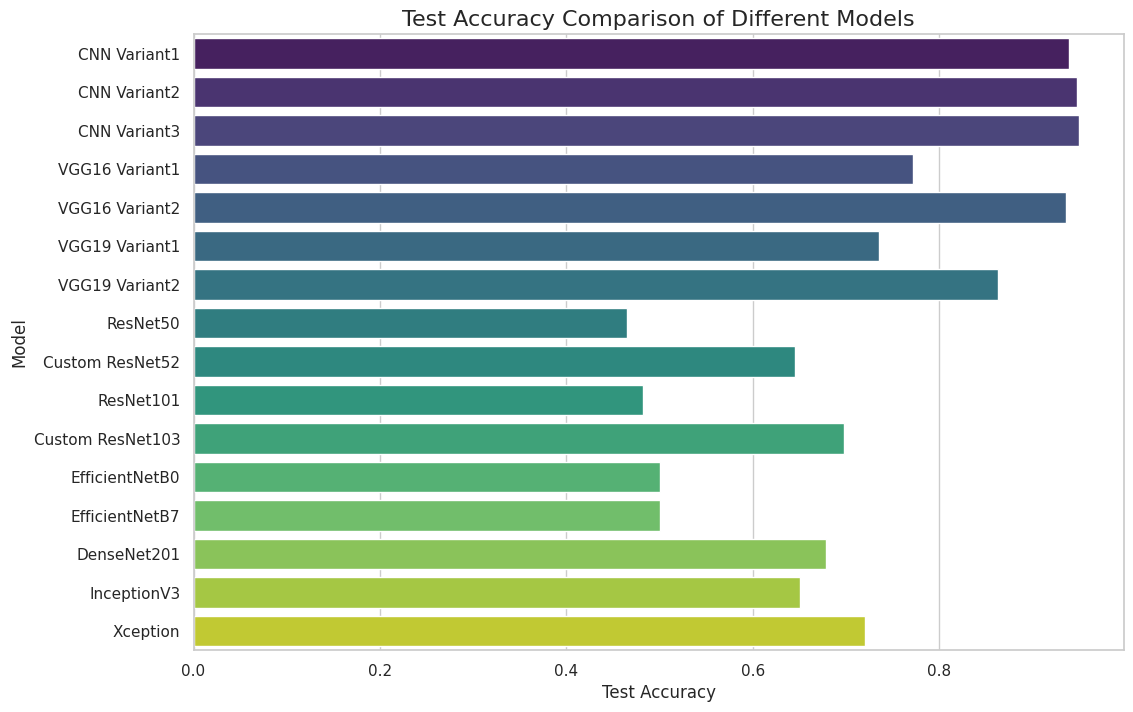

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x="Test Accuracy", y="Model", data=df, palette="viridis")

# Add title and labels
plt.title('Test Accuracy Comparison of Different Models', fontsize=16)
plt.xlabel('Test Accuracy')
plt.ylabel('Model')

# Display the plot
plt.show()


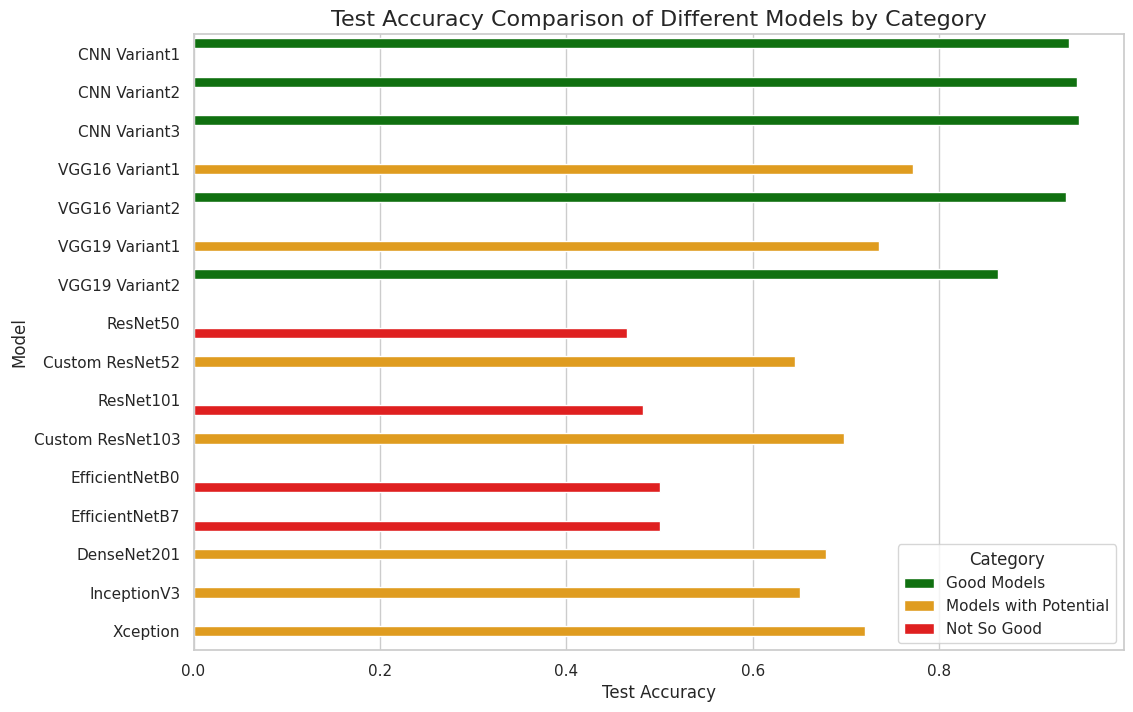

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to categorize models based on their test accuracy
def categorize_model(accuracy):
    if accuracy > 0.80:
        return "Good Models"
    elif accuracy > 0.60:
        return "Models with Potential"
    else:
        return "Not So Good"

# Apply the function to create a new column in the DataFrame
df['Category'] = df['Test Accuracy'].apply(categorize_model)

# Set the style of the plot
sns.set(style="whitegrid")

# Create a bar plot with different colors for each category
plt.figure(figsize=(12, 8))
sns.barplot(x="Test Accuracy", y="Model", hue="Category", data=df, palette={"Good Models": "green", "Models with Potential": "orange", "Not So Good": "red"})

# Add title and labels
plt.title('Test Accuracy Comparison of Different Models by Category', fontsize=16)
plt.xlabel('Test Accuracy')
plt.ylabel('Model')

# Display the legend
plt.legend(title="Category", loc="lower right")

# Display the plot
plt.show()


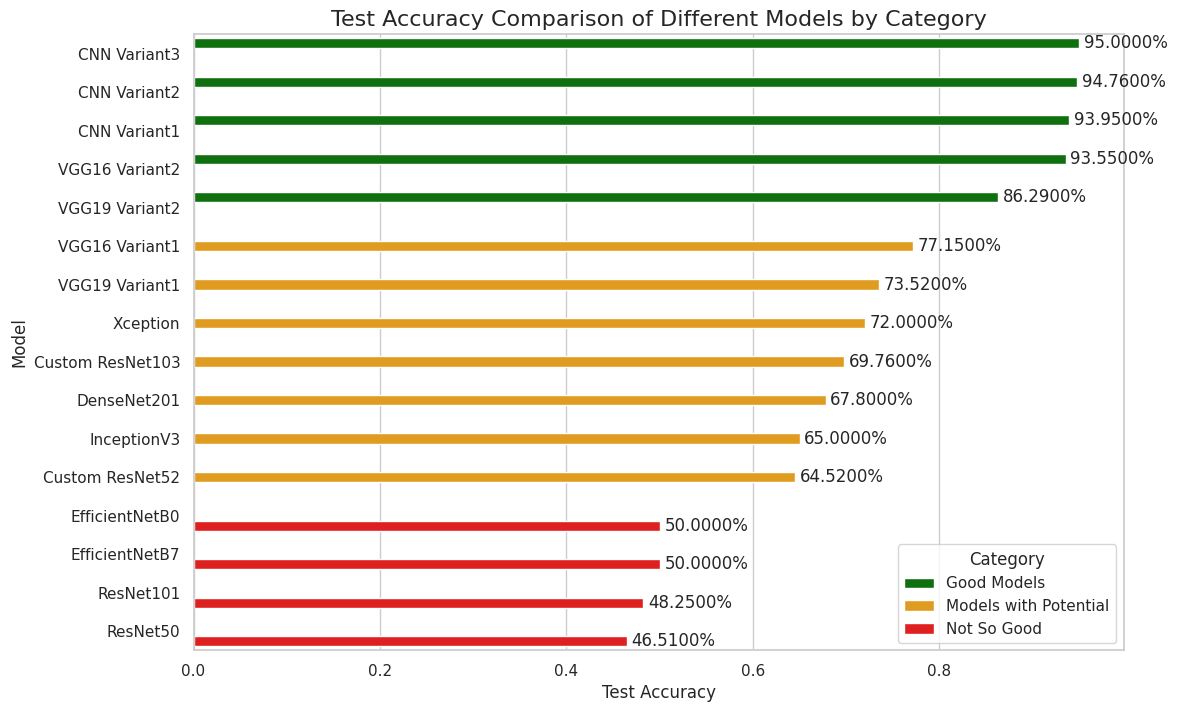

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorize models based on their test accuracy
def categorize_model(accuracy):
    if accuracy > 0.80:
        return "Good Models"
    elif accuracy > 0.60:
        return "Models with Potential"
    else:
        return "Not So Good"

# Apply the function to create a new column in the DataFrame
df['Category'] = df['Test Accuracy'].apply(categorize_model)

# Sort the DataFrame by Test Accuracy
df = df.sort_values('Test Accuracy', ascending=False)

# Set the style of the plot
sns.set(style="whitegrid")

# Create a bar plot with different colors for each category
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x="Test Accuracy", y="Model", hue="Category", data=df, palette={"Good Models": "green", "Models with Potential": "orange", "Not So Good": "red"})

# Add title and labels
plt.title('Test Accuracy Comparison of Different Models by Category', fontsize=16)
plt.xlabel('Test Accuracy')
plt.ylabel('Model')

# Add the percentages on the bars
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 0.05, p.get_y() + p.get_height() / 2, f'{width:.2%}', ha='center', va='center')

# Display the legend
plt.legend(title="Category", loc="lower right")

# Display the plot
plt.show()


This chart provides a **Test Accuracy Comparison of Different Models by Category**, illustrating the performance of various Convolutional Neural Network (CNN) architectures and their variants on an Alzheimer's classification task. The models are grouped into three categories based on their test accuracy: "Good Models," "Models with Potential," and "Not So Good."

The "Good Models" category, highlighted in green, showcases the top-performing models with test accuracies exceeding 90%. Notably, *CNN Variant 3* leads with an impressive 95.00% accuracy, followed closely by *CNN Variant 2* and *CNN Variant 1* at 94.76% and 93.95%, respectively. These models demonstrate strong generalization capabilities, likely due to their sophisticated architectures or well-tuned hyperparameters.

In contrast, the "Models with Potential," marked in yellow, display moderate accuracy. These include *VGG16 Variant 2* at 86.29% and *VGG19 Variant 2* at 77.15%. While these models perform reasonably well, they could benefit from additional tuning or more training data to enhance their accuracy further.

The "Not So Good" models, shown in red, indicate underperformance, with test accuracies hovering around 50% or lower. This group includes *EfficientNetB0*, *EfficientNetB7*, and various *ResNet* architectures. These results suggest that these models might not be well-suited to the specific task or the dataset used, indicating a need for significant adjustments or alternative approaches.

A key factor influencing these results is the preprocessing step where the original grayscale images were converted to RGB. CNN architectures typically expect RGB input, and this conversion was necessary to use these models. However, this transformation likely affected the performance of some models, particularly those that rely heavily on well-defined color channels. The drop in accuracy for certain architectures can be attributed to the data's altered structure after converting from grayscale to RGB. This highlights the importance of data preprocessing in machine learning, as the way data is prepared can significantly impact the outcome, particularly when adapting models to datasets they were not originally designed for.

# Tuning the best model

# CNN variant 3 tuning

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
CNN31 = Sequential()

# Convolutional layers
CNN31.add(Conv2D(256, (5, 5), activation='relu', input_shape=(128, 128,3)))
CNN31.add(MaxPooling2D(pool_size=(2, 2)))

CNN31.add(Conv2D(64, (5, 5), activation='relu'))
CNN31.add(MaxPooling2D(pool_size=(2, 2)))

CNN31.add(Conv2D(256, (5, 5), activation='relu'))
CNN31.add(MaxPooling2D(pool_size=(2, 2)))

CNN31.add(Conv2D(64, (5, 5), activation='relu'))
CNN31.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers before feeding into dense layers
CNN31.add(Flatten())

# Fully connected layers
CNN31.add(Dense(128, activation='relu'))
CNN31.add(Dropout(0.3))  # Dropout to prevent overfitting
CNN31.add(Dense(64, activation='relu'))

# Output layer (adjust number of units to match the number of classes)
CNN31.add(Dense(4, activation='softmax'))  # Assuming 4 classes based on the dataset

# Compile the model
CNN31.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
CNN31.summary()


2024-08-27 12:51:12.121403: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-27 12:51:12.121553: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-27 12:51:12.270563: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 124, 256)  │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 58, 58, 64)     │       409,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 256)    │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │       409,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,388,356 (5.30 MB)

 Trainable params: 1,388,356 (5.30 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
CNN31 = Sequential()

# Convolutional layers
CNN31.add(Conv2D(256, (4, 4), activation='relu', input_shape=(128, 128,3)))
CNN31.add(MaxPooling2D(pool_size=(2, 2)))

CNN31.add(Conv2D(64, (4, 4), activation='relu'))
CNN31.add(MaxPooling2D(pool_size=(2, 2)))

CNN31.add(Conv2D(256, (4, 4), activation='relu'))
CNN31.add(MaxPooling2D(pool_size=(2, 2)))

CNN31.add(Conv2D(64, (4, 4), activation='relu'))
CNN31.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers before feeding into dense layers
CNN31.add(Flatten())

# Fully connected layers
CNN31.add(Dense(128, activation='relu'))
CNN31.add(Dropout(0.5))  # Dropout to prevent overfitting
CNN31.add(Dense(64, activation='relu'))

# Output layer (adjust number of units to match the number of classes)
CNN31.add(Dense(4, activation='softmax'))  # Assuming 4 classes based on the dataset

# Compile the model
CNN31.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
CNN31.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 125, 125, 256)  │        12,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 62, 62, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 59, 59, 64)     │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 256)    │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 10, 10, 64)     │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,012,804 (3.86 MB)

 Trainable params: 1,012,804 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
CNN31 = Sequential()

# Convolutional layers
CNN31.add(Conv2D(256, (4, 4), activation='relu', input_shape=(128, 128,3)))
CNN31.add(MaxPooling2D(pool_size=(2, 2)))

CNN31.add(Conv2D(64, (4, 4), activation='relu'))
CNN31.add(MaxPooling2D(pool_size=(2, 2)))

CNN31.add(Conv2D(256, (4, 4), activation='relu'))
CNN31.add(MaxPooling2D(pool_size=(2, 2)))

CNN31.add(Conv2D(64, (4, 4), activation='relu'))
CNN31.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers before feeding into dense layers
CNN31.add(Flatten())

# Fully connected layers
CNN31.add(Dense(128, activation='relu'))
CNN31.add(Dropout(0.4))  # Dropout to prevent overfitting
CNN31.add(Dense(64, activation='relu'))

# Output layer (adjust number of units to match the number of classes)
CNN31.add(Dense(4, activation='softmax'))  # Assuming 4 classes based on the dataset

# Compile the model
CNN31.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
CNN31.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 125, 125, 256)  │        12,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 62, 62, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 59, 59, 64)     │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 256)    │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 10, 10, 64)     │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,012,804 (3.86 MB)

 Trainable params: 1,012,804 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
CNN31 = Sequential()

# Convolutional layers
CNN31.add(Conv2D(256, (4, 4), activation='relu', input_shape=(128, 128,3)))
CNN31.add(MaxPooling2D(pool_size=(2, 2)))

CNN31.add(Conv2D(64, (4, 4), activation='relu'))
CNN31.add(MaxPooling2D(pool_size=(2, 2)))

CNN31.add(Conv2D(256, (4, 4), activation='relu'))
CNN31.add(MaxPooling2D(pool_size=(2, 2)))

CNN31.add(Conv2D(64, (4, 4), activation='relu'))
CNN31.add(MaxPooling2D(pool_size=(2, 2)))

CNN31.add(Conv2D(64, (4, 4), activation='relu'))
CNN31.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers before feeding into dense layers
CNN31.add(Flatten())

# Fully connected layers
CNN31.add(Dense(128, activation='relu'))
CNN31.add(Dropout(0.2))  # Dropout to prevent overfitting
CNN31.add(Dense(64, activation='relu'))

# Output layer (adjust number of units to match the number of classes)
CNN31.add(Dense(4, activation='softmax'))  # Assuming 4 classes based on the dataset

# Compile the model
CNN31.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
CNN31.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 125, 125, 256)  │        12,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 62, 62, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 59, 59, 64)     │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 26, 26, 256)    │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 10, 10, 64)     │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 2, 2, 64)       │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 881,796 (3.36 MB)

 Trainable params: 881,796 (3.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
CNN31 = Sequential()

# Convolutional layers
CNN31.add(Conv2D(256, (5, 5), activation='relu', input_shape=(128, 128,3)))
CNN31.add(MaxPooling2D(pool_size=(2, 2)))

CNN31.add(Conv2D(64, (5, 5), activation='relu'))
CNN31.add(MaxPooling2D(pool_size=(2, 2)))

CNN31.add(Conv2D(256, (5, 5), activation='relu'))
CNN31.add(MaxPooling2D(pool_size=(2, 2)))




# Flattening the layers before feeding into dense layers
CNN31.add(Flatten())

# Fully connected layers
CNN31.add(Dense(128, activation='relu'))
CNN31.add(Dropout(0.2))  # Dropout to prevent overfitting
CNN31.add(Dense(64, activation='relu'))

# Output layer (adjust number of units to match the number of classes)
CNN31.add(Dense(4, activation='softmax'))  # Assuming 4 classes based on the dataset

# Compile the model
CNN31.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
CNN31.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 124, 124, 256)  │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 62, 62, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 58, 58, 64)     │       409,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 25, 25, 256)    │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │     4,718,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,566,212 (21.23 MB)

 Trainable params: 5,566,212 (21.23 MB)

 Non-trainable params: 0 (0.00 B)

# Proposed CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
CNN31p = Sequential()

# Convolutional layers
CNN31p.add(Conv2D(256, (4, 4), activation='relu', input_shape=(128, 128,3)))
CNN31p.add(MaxPooling2D(pool_size=(2, 2)))

CNN31p.add(Conv2D(64, (4, 4), activation='relu'))
CNN31p.add(MaxPooling2D(pool_size=(2, 2)))

CNN31p.add(Conv2D(256, (4, 4), activation='relu'))
CNN31p.add(MaxPooling2D(pool_size=(2, 2)))

CNN31p.add(Conv2D(64, (4, 4), activation='relu'))
CNN31p.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers before feeding into dense layers
CNN31p.add(Flatten())

# Fully connected layers
CNN31p.add(Dense(128, activation='relu'))
CNN31p.add(Dropout(0.3))  # Dropout to prevent overfitting
CNN31p.add(Dense(64, activation='relu'))

# Output layer (adjust number of units to match the number of classes)
CNN31p.add(Dense(4, activation='softmax'))  # Assuming 4 classes based on the dataset

# Compile the model
CNN31p.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
CNN31p.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 125, 125, 256)  │        12,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 59, 59, 64)     │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 256)    │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,012,804 (3.86 MB)

 Trainable params: 1,012,804 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
  1/146 ━━━━━━━━━━━━━━━━━━━━ 47:02 19s/step - accuracy: 0.1562 - loss: 1.3618

I0000 00:00:1724748483.818977     124 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1724748483.842443     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 15/146 ━━━━━━━━━━━━━━━━━━━━ 1:26 663ms/step - accuracy: 0.4003 - loss: 1.4221

W0000 00:00:1724748493.083418     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.5555 - loss: 1.1002

W0000 00:00:1724748520.536551     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


146/146 ━━━━━━━━━━━━━━━━━━━━ 60s 281ms/step - accuracy: 0.5557 - loss: 1.0997 - val_accuracy: 0.4046 - val_loss: 1.3493
Epoch 2/100


W0000 00:00:1724748524.674394     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


146/146 ━━━━━━━━━━━━━━━━━━━━ 23s 152ms/step - accuracy: 0.5909 - loss: 1.0036 - val_accuracy: 0.4046 - val_loss: 1.4852
Epoch 3/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 24s 157ms/step - accuracy: 0.5876 - loss: 1.0098 - val_accuracy: 0.4046 - val_loss: 1.2587
Epoch 4/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 24s 155ms/step - accuracy: 0.5786 - loss: 0.9880 - val_accuracy: 0.4046 - val_loss: 1.3183
Epoch 5/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 24s 156ms/step - accuracy: 0.6025 - loss: 0.8695 - val_accuracy: 0.5349 - val_loss: 1.0790
Epoch 6/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 24s 153ms/step - accuracy: 0.6169 - loss: 0.8213 - val_accuracy: 0.5457 - val_loss: 1.0275
Epoch 7/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 24s 157ms/step - accuracy: 0.6363 - loss: 0.7845 - val_accuracy: 0.6196 - val_loss: 0.8695
Epoch 8/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 24s 158ms/step - accuracy: 0.6579 - loss: 0.7749 - val_accuracy: 0.5847 - val_loss: 0.9420
Epoch 9/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 23s 153ms/step - accuracy: 0.6413 - loss: 0.768

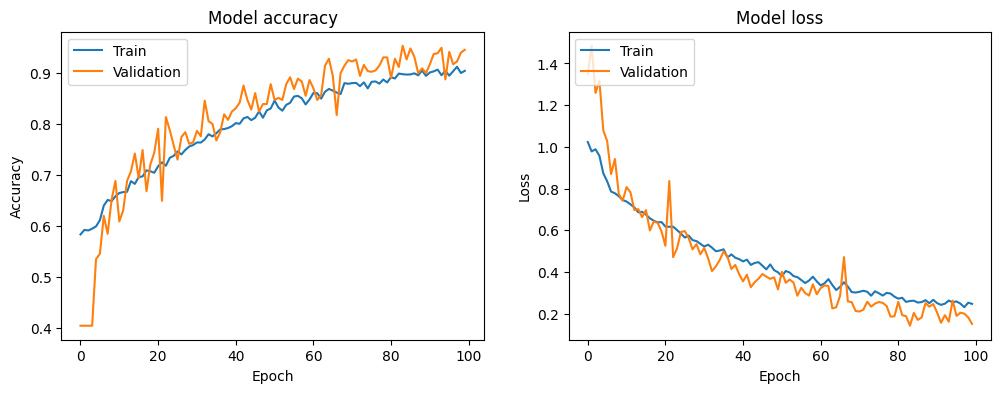

In [ ]:
# Train the model and capture the history
history = CNN31p.fit(
    train_generator,
    epochs=100,
    validation_data=test_generator  # Use the test_generator for validation
)

# Plotting the loss and accuracy curves
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
# Evaluate the custom models on the test data
loss, accuracy17 = CNN31.evaluate(test_generator)

# Print the accuracy
print(f"Test Accuracy of CNN31: {accuracy17}")


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9384 - loss: 0.1580
Test Accuracy of CNN31: 0.9448924660682678


 # Performance of Proposed Model

In [ ]:

# Evaluate the model on test data
loss, accuracy18 = CNN31p.evaluate(test_generator)
print(f"Test Accuracy: {accuracy18 * 100:.2f}%")


24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 280ms/step - accuracy: 0.9612 - loss: 0.0959
Test Accuracy: 97.04%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


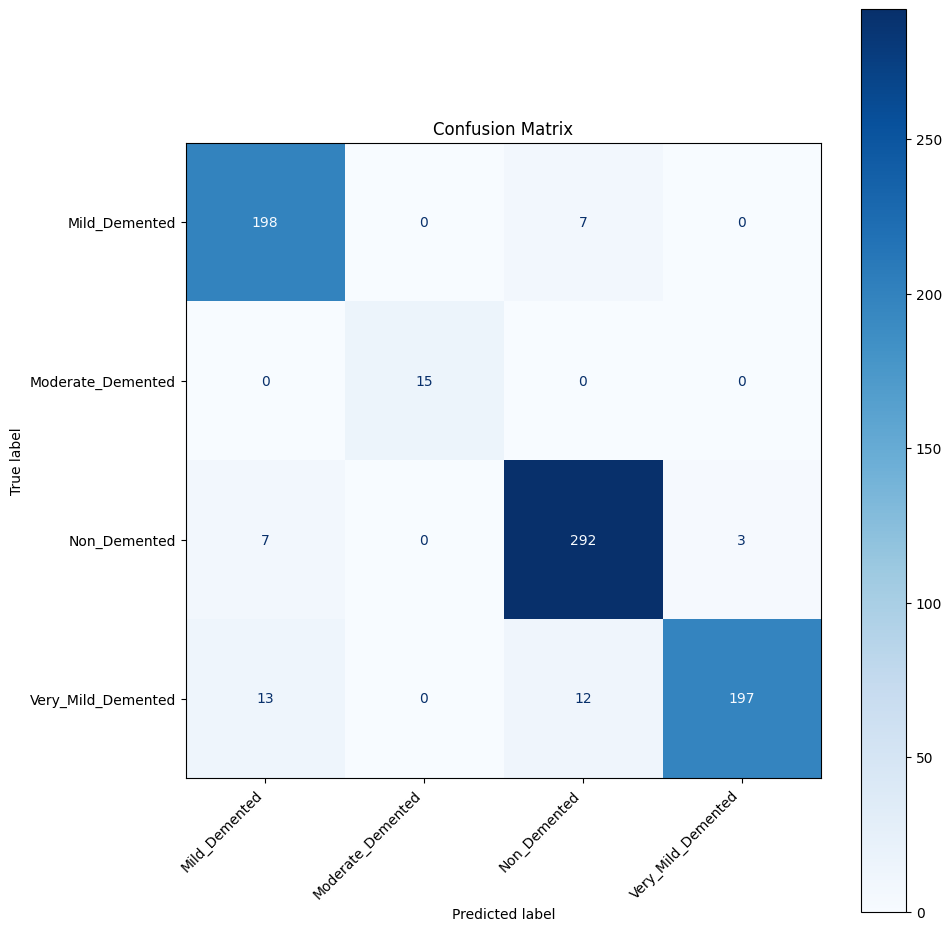

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to collect predictions and true labels
all_true_labels = []
all_predicted_labels = []

# Iterate through the test generator to collect all data
for images, true_labels in test_generator:
    predicted_labels = CNN31_loaded1.predict(images)
    predicted_labels = np.argmax(predicted_labels, axis=1)  # Convert predictions to label indices

    # Convert true labels from one-hot encoding to class indices
    true_labels_indices = np.argmax(true_labels, axis=1)

    # Extend the lists with the current batch
    all_true_labels.extend(true_labels_indices)
    all_predicted_labels.extend(predicted_labels)

    # Break the loop if all test data has been processed
    if len(all_true_labels) >= test_generator.samples:
        break

# Convert lists to numpy arrays for confusion matrix
all_true_labels = np.array(all_true_labels)
all_predicted_labels = np.array(all_predicted_labels)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Compute confusion matrix
cm = confusion_matrix(all_true_labels, all_predicted_labels, labels=list(test_generator.class_indices.values()))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Adjust figure size for better readability
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=True)

# Increase space around the row labels
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

# Adjust layout to ensure labels are visible
plt.tight_layout()

plt.title('Confusion Matrix')
plt.show()


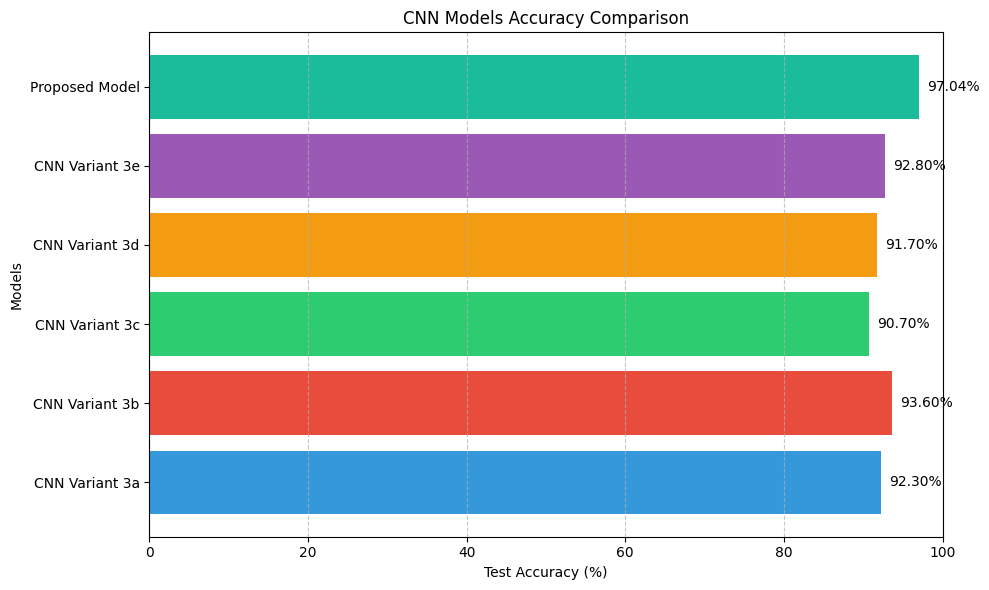

In [ ]:
import matplotlib.pyplot as plt

# Model names and their accuracies
models = ["CNN Variant 3a", "CNN Variant 3b", "CNN Variant 3c", "CNN Variant 3d", "CNN Variant 3e", "Proposed Model"]
accuracies = [92.3, 93.6,90.7, 91.7, 92.8, 97.04]  # Note: Updated 90/3 to 30 for clarity

# Define a color palette
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(models, accuracies, color=colors)
plt.xlabel('Test Accuracy (%)')
plt.ylabel('Models')
plt.title('CNN Models Accuracy Comparison')
plt.xlim(0, 100)  # Adjust according to the scale of accuracies
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, f'{width:.2f}%',
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()

# Show the plot
plt.show()



CNN31p - Proposed Model
1. Convolutional Layers:

Conv2D Layer 1: 256 filters, 4x4 kernel, ReLU activation. This initial layer captures a broad range of features from the input images.
MaxPooling2D Layer 1: Pool size of 2x2. Reduces the spatial dimensions of the feature maps while retaining important information.
Conv2D Layer 2: 64 filters, 4x4 kernel, ReLU activation. This layer refines the feature extraction with fewer filters to focus on more specific features.
MaxPooling2D Layer 2: Pool size of 2x2. Further downsamples the feature maps.
Conv2D Layer 3: 256 filters, 4x4 kernel, ReLU activation. Enhances feature extraction by increasing the number of filters.
MaxPooling2D Layer 3: Pool size of 2x2. Continues to reduce spatial dimensions.
Conv2D Layer 4: 64 filters, 4x4 kernel, ReLU activation. Final convolutional layer focusing on additional feature extraction.
MaxPooling2D Layer 4: Pool size of 2x2. Completes the downsampling process.
These layers progressively extract and refine features from the input images, with pooling layers reducing spatial dimensions and capturing key patterns.

2. Flattening:

Converts the 3D feature maps into a 1D vector, preparing the data for the fully connected layers.


3. Fully Connected Layers:

Dense Layer 1: 128 units, ReLU activation. Processes the flattened feature vector to learn high-level representations.
Dropout Layer: Dropout rate of 0.3. Helps prevent overfitting by randomly dropping units during training.
Dense Layer 2: 64 units, ReLU activation. Further processes the features for classification.


4. Output Layer:

Dense Layer: 4 units, softmax activation function. Outputs probabilities for each of the 4 classes in the classification task.


5. Compilation:

Optimizer: Adam. An adaptive learning rate optimizer that adjusts based on the gradients.
Loss Function: Categorical Crossentropy. Measures the performance of the model for multi-class classification.
Metrics: Accuracy. Evaluates the performance based on classification accuracy.
Model Summary: The CNN31p model is designed with a combination of custom convolutional and pooling layers to effectively extract features from images. The architecture progresses through multiple convolutional layers, each followed by pooling to downsample and refine features. The model includes dropout layers to address overfitting and is finalized with a softmax output layer for multi-class classification.

In [ ]:

CNN31p.save('/kaggle/working/CNN31p.h5')

In [ ]:
from tensorflow.keras.models import load_model

CNN31_loaded1= load_model('CNN31p.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


W0000 00:00:1724752605.382802     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


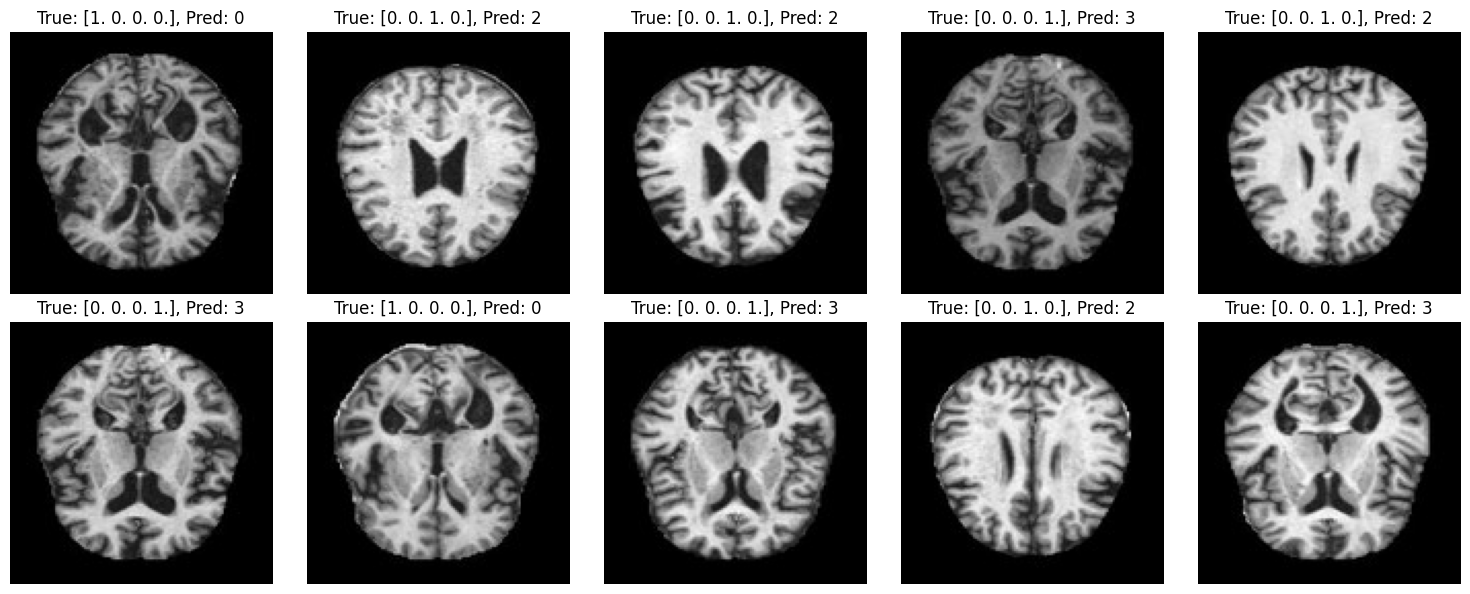

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your test_generator already defined
# Get one batch of data
images, true_labels = next(test_generator)

# Get model predictions for this batch
predicted_labels = CNN31_loaded1.predict(images)
predicted_labels = np.argmax(predicted_labels, axis=1)  # Convert predictions to label indices

# Plot the images with their true and predicted labels
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    if i < len(images):
        ax.imshow(images[i].squeeze(), cmap='gray')  # Use cmap='gray' for grayscale images
        true_label = true_labels[i]
        predicted_label = predicted_labels[i]
        ax.set_title(f"True: {true_label}, Pred: {predicted_label}")
        ax.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


W0000 00:00:1723707038.491805     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


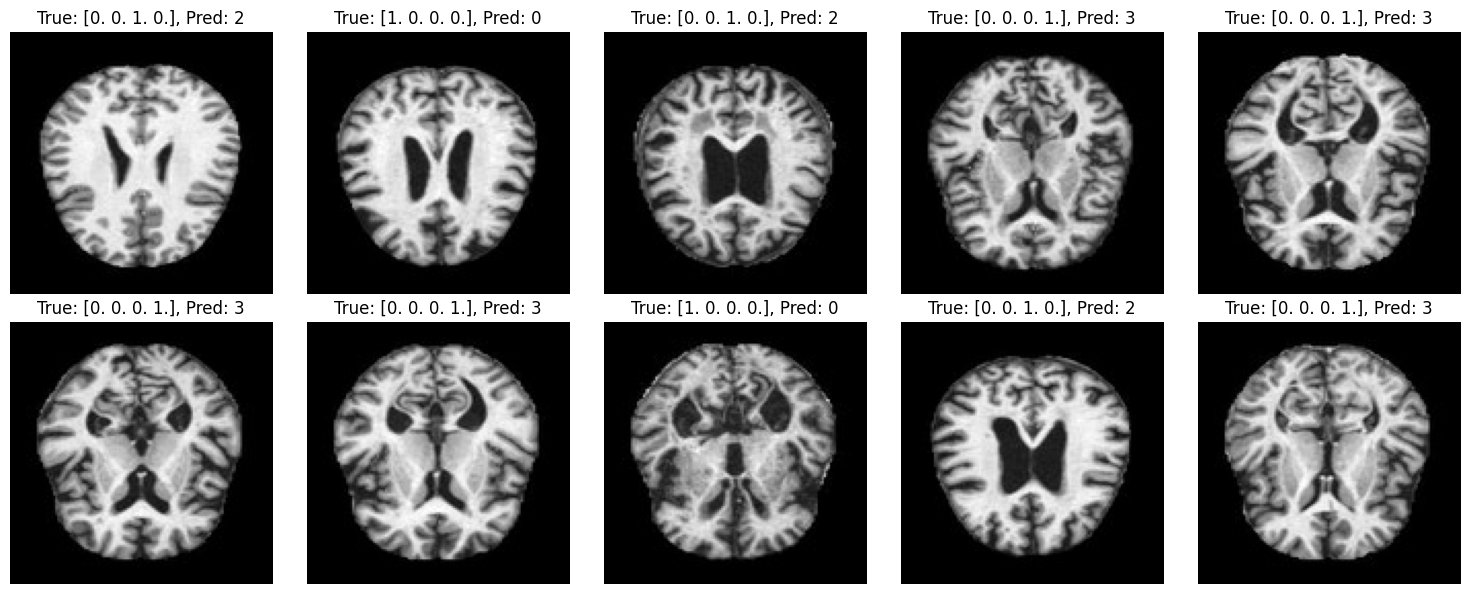

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your test_generator already defined
# Get one batch of data
images, true_labels = next(test_generator)

# Get model predictions for this batch
predicted_labels = CNN31_loaded1.predict(images)
predicted_labels = np.argmax(predicted_labels, axis=1)  # Convert predictions to label indices

# Plot the images with their true and predicted labels
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    if i < len(images):
        ax.imshow(images[i].squeeze(), cmap='gray')  # Use cmap='gray' for grayscale images
        true_label = true_labels[i]
        predicted_label = predicted_labels[i]
        ax.set_title(f"True: {true_label}, Pred: {predicted_label}")
        ax.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


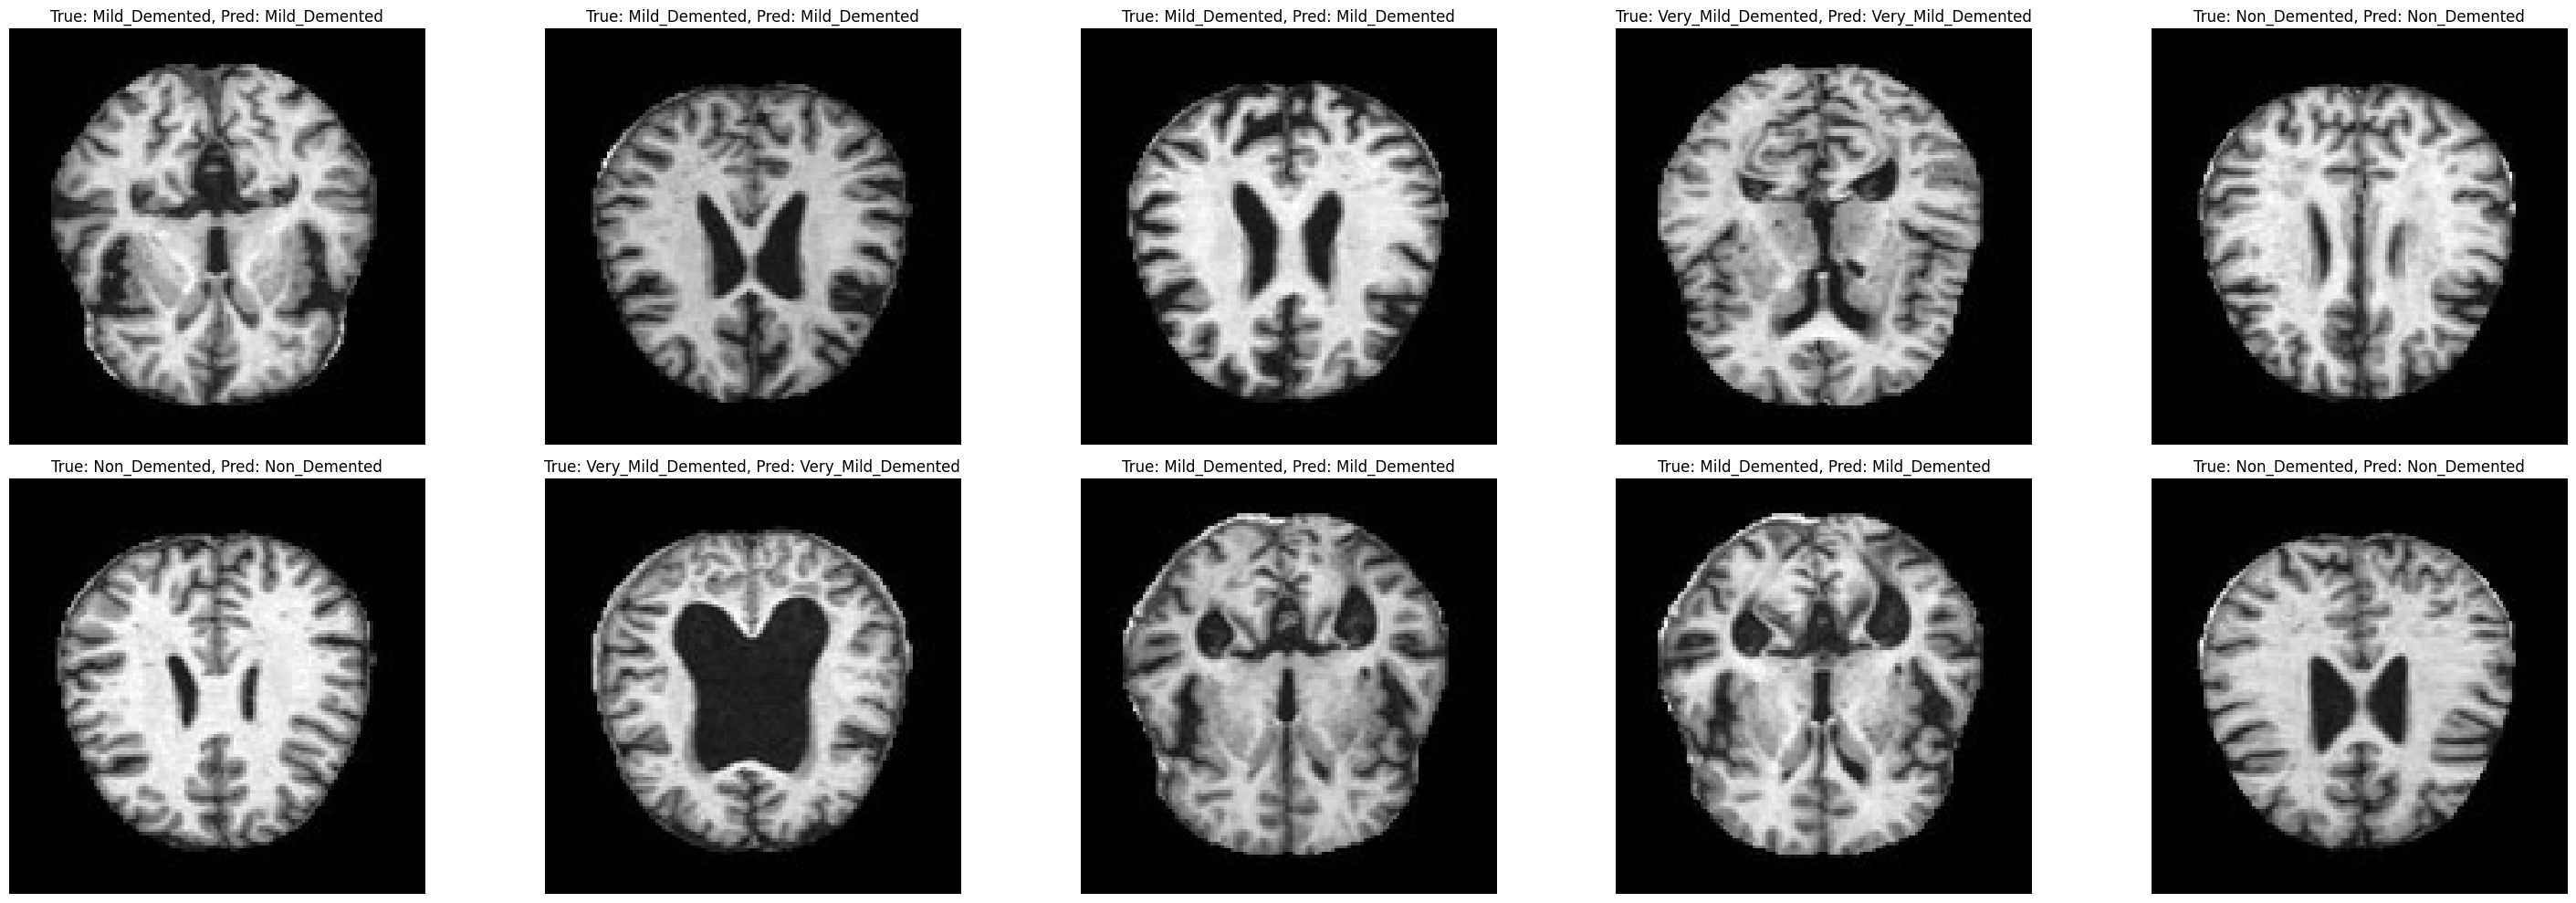

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your test_generator already defined and a model
# Get the class indices from the generator
class_indices = test_generator.class_indices
# Reverse the class indices dictionary to get a mapping from index to class name
index_to_class = {v: k for k, v in class_indices.items()}

# Get one batch of data
images, true_labels = next(test_generator)

# Get model predictions for this batch
predictions = CNN31_loaded1.predict(images)
predicted_indices = np.argmax(predictions, axis=1)  # Convert predictions to label indices

# Convert true and predicted indices to class names
true_class_names = [index_to_class[idx] for idx in np.argmax(true_labels, axis=1)]
predicted_class_names = [index_to_class[idx] for idx in predicted_indices]

# Plot the images with their true and predicted class names
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(30, 10))

for i, ax in enumerate(axes.flat):
    if i < len(images):
        ax.imshow(images[i].squeeze(), cmap='gray')  # Use cmap='gray' for grayscale images
        true_class_name = true_class_names[i]
        predicted_class_name = predicted_class_names[i]
        ax.set_title(f"True: {true_class_name}, Pred: {predicted_class_name}")
        ax.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()


In [ ]:
# Assuming you have a test_generator defined
# Extract the class indices mapping from the generator
class_indices = test_generator.class_indices

# Print the mapping of indices to class names
print("Class Indices to Class Names Mapping:")
for class_name, index in class_indices.items():
    print(f"Index {index}: Class '{class_name}'")


Class Indices to Class Names Mapping:
Index 0: Class 'Mild_Demented'
Index 1: Class 'Moderate_Demented'
Index 2: Class 'Non_Demented'
Index 3: Class 'Very_Mild_Demented'


In [ ]:
# Assuming 'model' is your Keras model
CNN31.save('/kaggle/working/CNN31k.h5')  # Save as HDF5 format

# Or save in the TensorFlow SavedModel format
CNN31.save('/kaggle/working/CNN31t.h5', save_format='tf')